Importing necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from collections import Counter

Reading the oil spill dataset

In [43]:
!mkdir data/
!wget https://raw.githubusercontent.com/JasCapasci/Oil-Spill-Dataset/main/oil_spill.csv
df = pd.read_csv("/content/oil_spill.csv");
df.head()

mkdir: cannot create directory ‘data/’: File exists
--2024-04-25 18:25:58--  https://raw.githubusercontent.com/JasCapasci/Oil-Spill-Dataset/main/oil_spill.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232113 (227K) [text/plain]
Saving to: ‘oil_spill.csv.2’

oil_spill.csv.2     100%[===================>] 226.67K  --.-KB/s    in 0.02s   

2024-04-25 18:25:58 (12.4 MB/s) - ‘oil_spill.csv.2’ saved [232113/232113]



,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


The columns here are feature vectors of the satellite images processed through computer vision algorithm but are labeled f_1, f_2, f_3 etc cause a good dataset could only be retrived from one of the Kaggle contests. A more reliable and accurate dataset was not available online or most likely I couldn't retrieve it from the online resources. Thus these columns should be considered as my input feature vectors of the images and I will proceed with developing a model using them.

Displaying information about the oil spill dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

Showing descriptive statistics of the oil spill dataset

In [45]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


Checking for missing values in the dataset

In [46]:
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

Analytical Plots

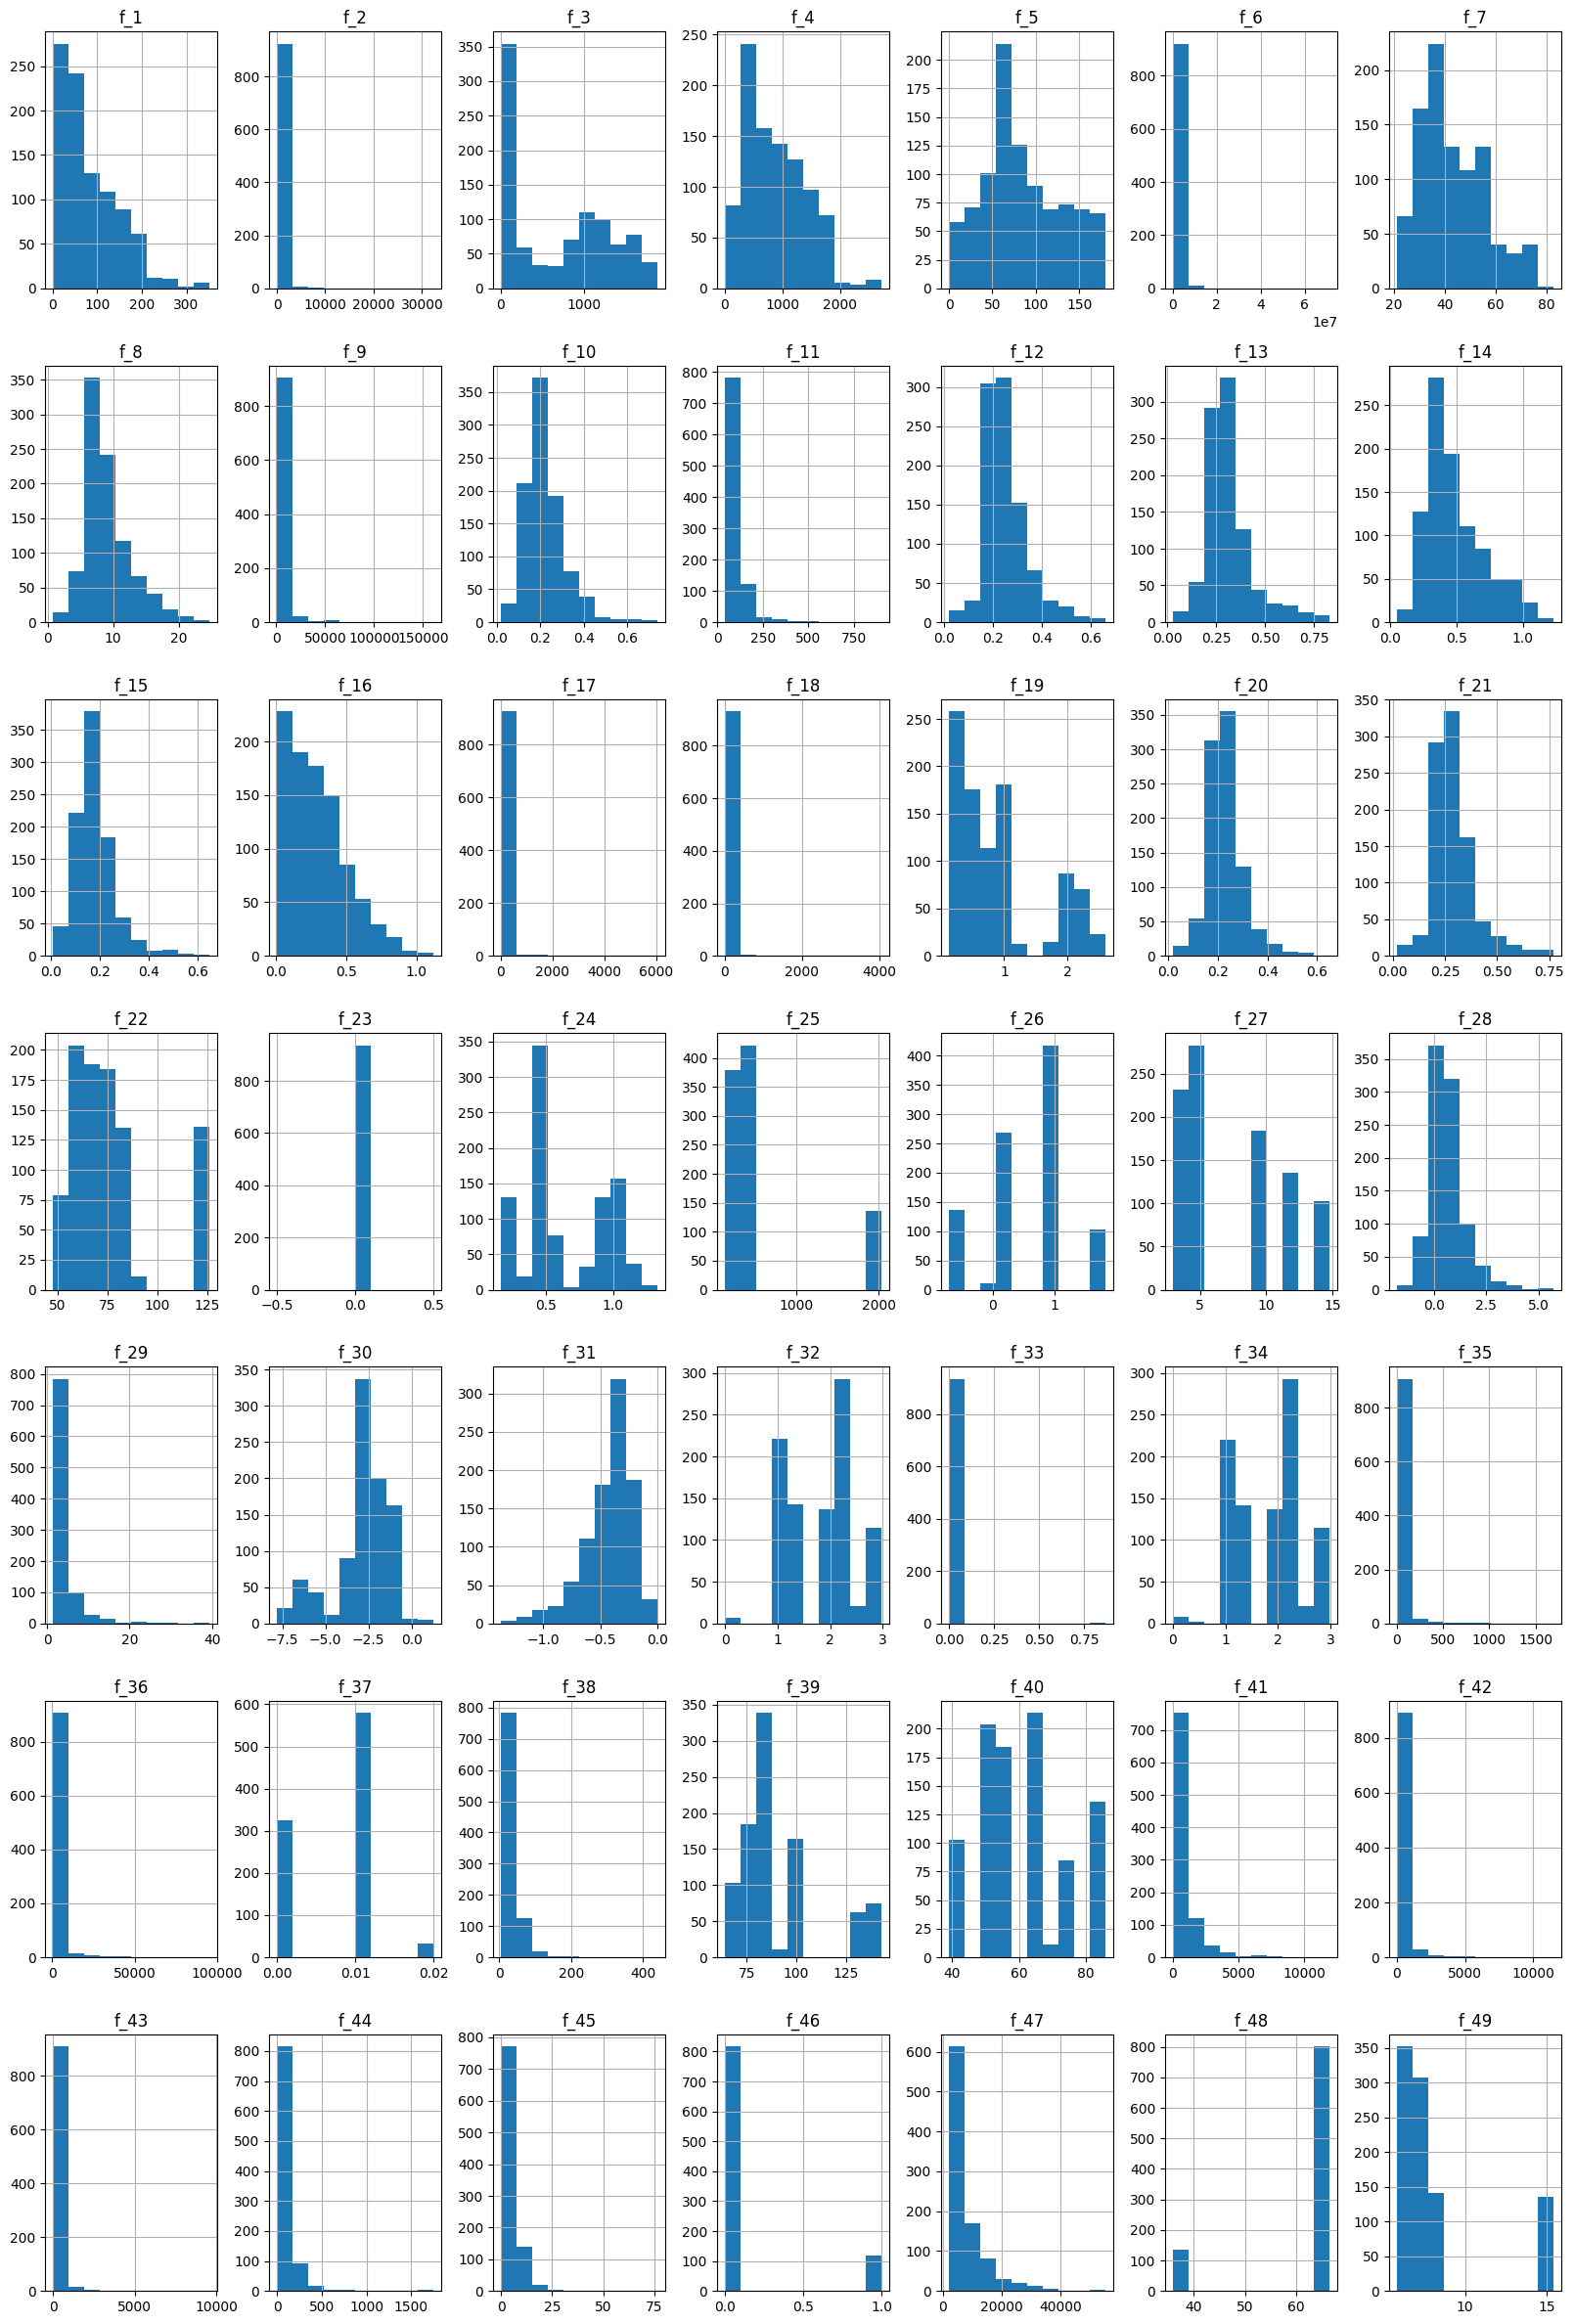

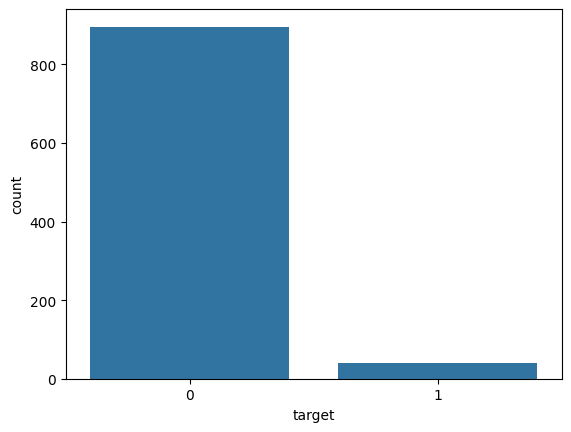

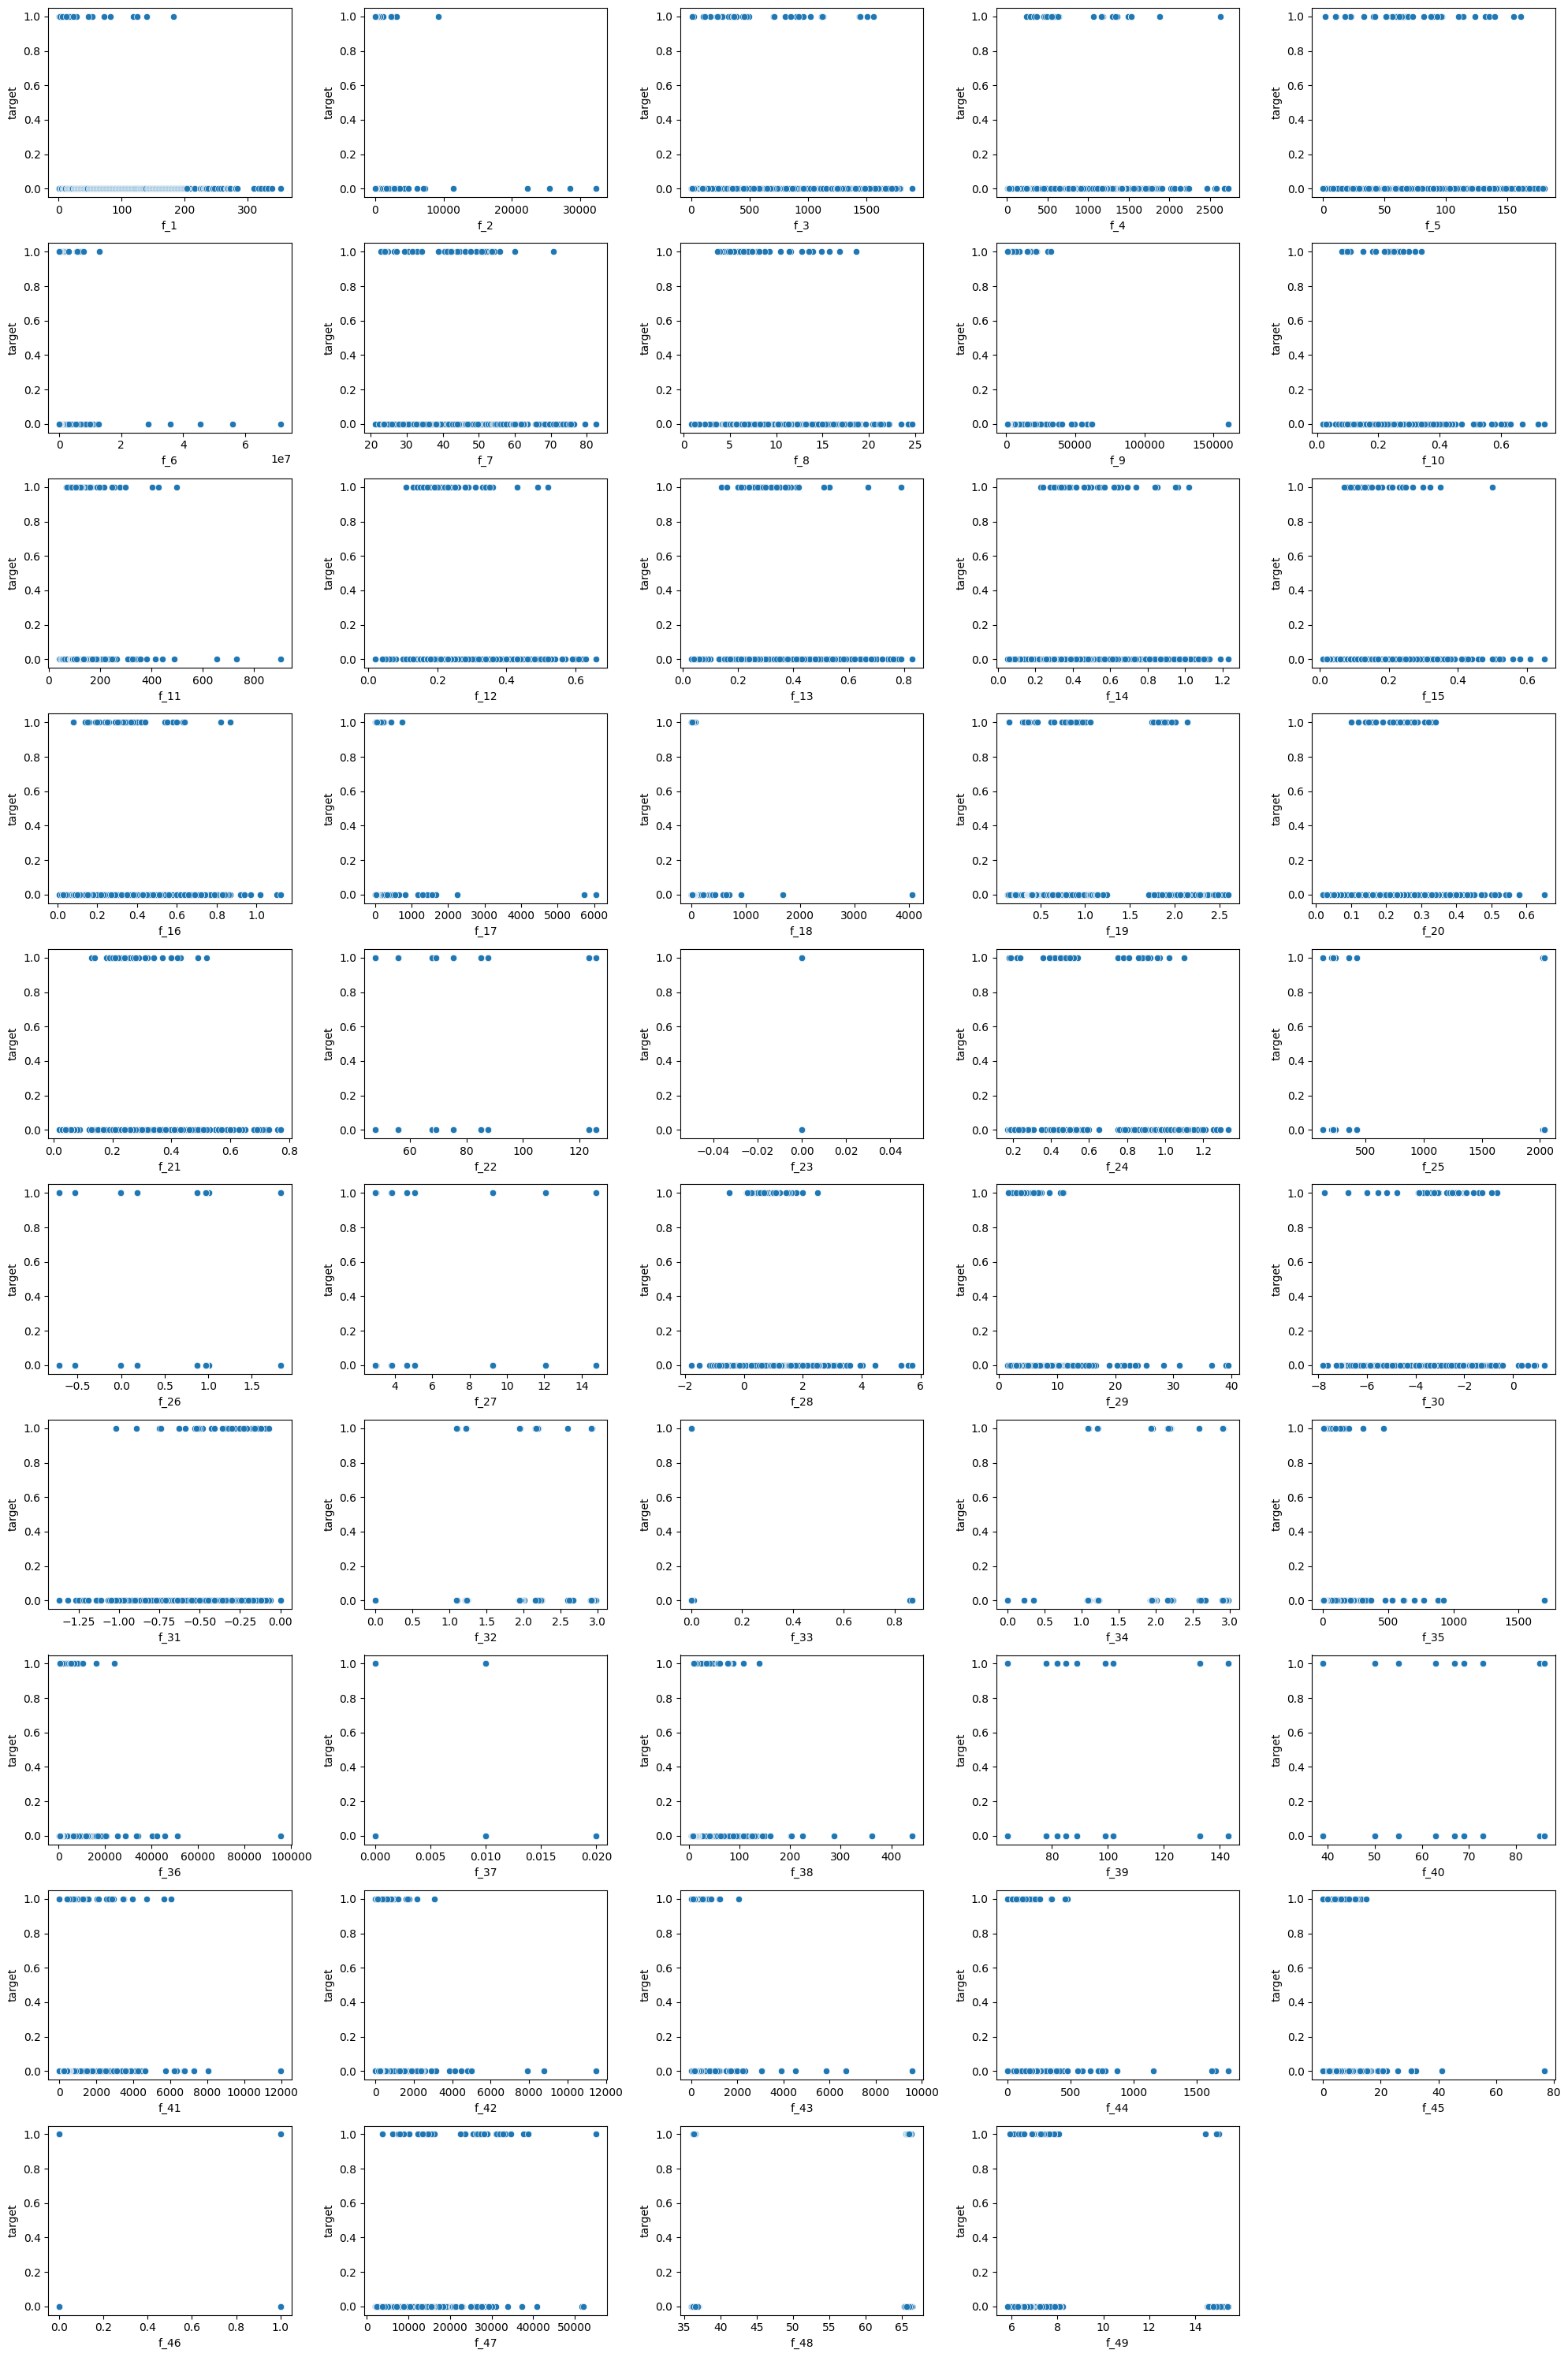

In [41]:
# Univariate Analysis
# Histograms for each numerical feature
df.drop(columns=['target']).hist(figsize=(20, 30))
plt.show()

# Bar plot for 'target' distribution
sns.countplot(x='target', data=df)
plt.show()

# Bivariate Analysis
# Scatter plots for relationship between features and 'target'
plt.figure(figsize=(20, 30))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(10, 5, i+1)
    sns.scatterplot(x=col, y='target', data=df)
plt.tight_layout()
plt.show()

Correlation Matrix

In [ ]:
plt.figure(figsize=(80,60))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Analyzing trends and identifying outliers using box plots

In [48]:
num_cols = len(df.columns[:-1])
num_rows = (num_cols - 1) // 4 + 1  # Calculate the number of rows needed for the subplot grid

plt.figure(figsize=(80,70))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(num_rows, 4, i+1)
    sns.boxplot(x='target', y=col, data=df)
plt.tight_layout()
plt.show()

Performing min-max scaling on the features to normalize their values

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the name of your target variable
y = df['target']  # Assuming 'target' is the name of your target variable

# Min-max scaling on X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
X_scaled_df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
0,0.000000,0.078693,0.795369,0.167291,0.500000,0.088774,0.319870,0.295893,0.181873,0.236111,...,0.638298,0.238507,0.086957,0.079550,0.077489,0.048675,0.0,0.587669,0.976721,0.222222
1,0.002849,0.689181,0.040816,0.308430,1.000000,0.782405,0.486482,0.015926,0.382532,0.000000,...,0.638298,0.481199,1.000000,1.000000,0.943179,0.007830,0.0,0.932995,0.976393,0.046729
2,0.005698,0.003243,0.765631,0.223027,0.488889,0.003048,0.312378,0.272842,0.016699,0.222222,...,0.638298,0.117161,0.021739,0.015636,0.025816,0.121754,1.0,0.558460,0.979016,0.210800
3,0.008547,0.036783,0.825213,0.108185,0.366667,0.041157,0.344625,0.299246,0.108469,0.236111,...,0.638298,0.505595,0.066224,0.047241,0.082929,0.173953,1.0,0.671567,0.974426,0.234683
4,0.011396,0.009327,0.501465,0.161501,0.205556,0.009961,0.328827,0.259849,0.016761,0.208333,...,0.638298,0.110470,0.061794,0.053426,0.062444,0.033668,0.0,0.508444,0.974098,0.159917


Splitting the dataset

In [50]:
X = df.iloc[:,:-1]
y = df['target']

In [51]:
X.shape


(937, 49)

In [52]:
y.shape

(937,)

In [53]:
y.value_counts()

target
0    896
1     41
Name: count, dtype: int64

It is clear from the value counts that data for target label 1 are less than target label 0 which makes the dataset unbalanced

Over Sampling

In [54]:
#y labels are - 896: 41 (divide both by 937 to get weights)
X, y = make_classification(n_classes = 2, class_sep = 2, weights = [0.95, 0.04],
                           n_informative = 3, n_redundant = 1, flip_y = 0, n_features = 49,
                          n_clusters_per_class = 1, n_samples = 937, random_state = 34)

print('Orignal dataset shape %s' % Counter(y))

Orignal dataset shape Counter({0: 895, 1: 42})


In [55]:
!pip install imblearn

In [56]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 34)
X_res, y_res = ros.fit_resample(X, y)

print('Reshaped dataset shape %s' % Counter(y_res))

Reshaped dataset shape Counter({0: 895, 1: 895})


Splitting the dataset into training and testing sets for model evaluation

In [57]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=34)

# Display the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (655, 49)
X_test shape: (282, 49)
y_train shape: (655,)
y_test shape: (282,)


Training different classification models and evaluating their performance using the classification report

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Random Forest
rf_classifier = RandomForestClassifier(random_state=93)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=93)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)

# XGBoost
xgb_classifier = XGBClassifier(random_state=93)
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)

# k-Nearest Neighbors (kNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=93)
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

# Display results
print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - Classification Report:\n", rf_report)
print("\nDecision Tree - Accuracy:", dt_accuracy)
print("Decision Tree - Classification Report:\n", dt_report)
print("\nXGBoost - Accuracy:", xgb_accuracy)
print("XGBoost - Classification Report:\n", xgb_report)
print("\nNaive Bayes - Accuracy:", nb_accuracy)
print("Naive Bayes - Classification Report:\n", nb_report)
print("\nk-Nearest Neighbors (kNN) - Accuracy:", knn_accuracy)
print("k-Nearest Neighbors (kNN) - Classification Report:\n", knn_report)
print("\nSupport Vector Machine (SVM) - Accuracy:", svm_accuracy)
print("Support Vector Machine (SVM) - Classification Report:\n", svm_report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - Accuracy: 0.950354609929078
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       268
           1       0.00      0.00      0.00        14

    accuracy                           0.95       282
   macro avg       0.48      0.50      0.49       282
weighted avg       0.90      0.95      0.93       282


Decision Tree - Accuracy: 0.900709219858156
Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       268
           1       0.00      0.00      0.00        14

    accuracy                           0.90       282
   macro avg       0.47      0.47      0.47       282
weighted avg       0.90      0.90      0.90       282


XGBoost - Accuracy: 0.9432624113475178
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Hyperparameter tuning for all three best performing models (Random Forest, SVM, kNN) using GridSearchCV to improve its performance

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=93), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

rf_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Best Random Forest - Accuracy:", rf_accuracy)
print("Best Random Forest - Classification Report:\n", rf_report)
print("Best Random Forest - Hyperparameters:", best_rf_params)

# Support Vector Machine (SVM)
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm_grid_search = GridSearchCV(SVC(random_state=93), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

best_svm_params = svm_grid_search.best_params_
best_svm_model = svm_grid_search.best_estimator_

svm_pred = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

print("\nBest SVM - Accuracy:", svm_accuracy)
print("Best SVM - Classification Report:\n", svm_report)
print("Best SVM - Hyperparameters:", best_svm_params)

# k-Nearest Neighbors (kNN)
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

best_knn_params = knn_grid_search.best_params_
best_knn_model = knn_grid_search.best_estimator_

knn_pred = best_knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

print("\nBest k-Nearest Neighbors (kNN) - Accuracy:", knn_accuracy)
print("Best k-Nearest Neighbors (kNN) - Classification Report:\n", knn_report)
print("Best k-Nearest Neighbors (kNN) - Hyperparameters:", best_knn_params)


Hyperparameter tuning for all the 3 models using GridSearchCV with KFold cross-validation to improve its performance

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=93)

# Grid search parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Grid search parameter grid for kNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Random Forest
rf_grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=93), rf_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
rf_grid_search_cv.fit(X_train, y_train)

best_rf_params_cv = rf_grid_search_cv.best_params_
best_rf_model_cv = rf_grid_search_cv.best_estimator_

rf_pred_cv = best_rf_model_cv.predict(X_test)
rf_accuracy_cv = accuracy_score(y_test, rf_pred_cv)
rf_report_cv = classification_report(y_test, rf_pred_cv)

print("Best Random Forest with KFold - Accuracy:", rf_accuracy_cv)
print("Best Random Forest with KFold - Classification Report:\n", rf_report_cv)
print("Best Random Forest with KFold - Hyperparameters:", best_rf_params_cv)

# Support Vector Machine (SVM)
svm_grid_search_cv = GridSearchCV(SVC(random_state=93), svm_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
svm_grid_search_cv.fit(X_train, y_train)

best_svm_params_cv = svm_grid_search_cv.best_params_
best_svm_model_cv = svm_grid_search_cv.best_estimator_

svm_pred_cv = best_svm_model_cv.predict(X_test)
svm_accuracy_cv = accuracy_score(y_test, svm_pred_cv)
svm_report_cv = classification_report(y_test, svm_pred_cv)

print("\nBest SVM with KFold - Accuracy:", svm_accuracy_cv)
print("Best SVM with KFold - Classification Report:\n", svm_report_cv)
print("Best SVM with KFold - Hyperparameters:", best_svm_params_cv)

# k-Nearest Neighbors (kNN)
knn_grid_search_cv = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
knn_grid_search_cv.fit(X_train, y_train)

best_knn_params_cv = knn_grid_search_cv.best_params_
best_knn_model_cv = knn_grid_search_cv.best_estimator_

knn_pred_cv = best_knn_model_cv.predict(X_test)
knn_accuracy_cv = accuracy_score(y_test, knn_pred_cv)
knn_report_cv = classification_report(y_test, knn_pred_cv)

print("\nBest kNN with KFold - Accuracy:", knn_accuracy_cv)
print("Best kNN with KFold - Classification Report:\n", knn_report_cv)
print("Best kNN with KFold - Hyperparameters:", best_knn_params_cv)

The performance of models remain the same even after hyperparameter tuning and cross validation

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix and ROC curve
def plot_evaluation_metrics(model, X_test, y_test):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Decision Function Scores for SVM
    if hasattr(model, 'decision_function'):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict(X_test)  # Use predictions if decision function scores are not available

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_score)))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Random Forest
print("Random Forest Evaluation:")
plot_evaluation_metrics(best_rf_model, X_test, y_test)

# SVM
print("SVM Evaluation:")
plot_evaluation_metrics(best_svm_model, X_test, y_test)

# k-Nearest Neighbors (kNN)
print("kNN Evaluation:")
plot_evaluation_metrics(best_knn_model, X_test, y_test)
